In [154]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split

In [155]:
df_class = pd.read_excel("従業員データ.xlsx")
df_class.head()

,社員番号,年次,月給(万円),管理職,社員満足度,Result
0,E153570,13,52,0,4.0,0
1,E233970,15,63,1,4.0,0
2,E822851,16,54,0,4.2,1
3,E942154,11,50,0,4.0,0
4,E527102,8,35,0,2.1,0


In [156]:
y = df_class["Result"]
X = df_class[["年次","月給(万円)","管理職","社員満足度"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y
)

In [157]:
#決定木
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight="balanced", max_depth=2)
model.fit(X_train, y_train)



DecisionTreeClassifier(class_weight='balanced', max_depth=2)

In [158]:
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = model.predict(X_train) #学習データでの予測結果
cr = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(cr)

,0,1,accuracy,macro avg,weighted avg
precision,0.796020,0.355705,0.608571,0.575862,0.677764
recall,0.625000,0.563830,0.608571,0.594415,0.608571
f1-score,0.700219,0.436214,0.608571,0.568216,0.629315
support,256.000000,94.000000,0.608571,350.000000,350.000000


In [159]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,  y_pred) 
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr) #テストデータでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.779221,0.315068,0.553333,0.547145,0.655447
recall,0.545455,0.575000,0.553333,0.560227,0.553333
f1-score,0.641711,0.407080,0.553333,0.524395,0.579143
support,110.000000,40.000000,0.553333,150.000000,150.000000


c:\Users\kawam\Documents\IT勉強\practice_pythondata\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


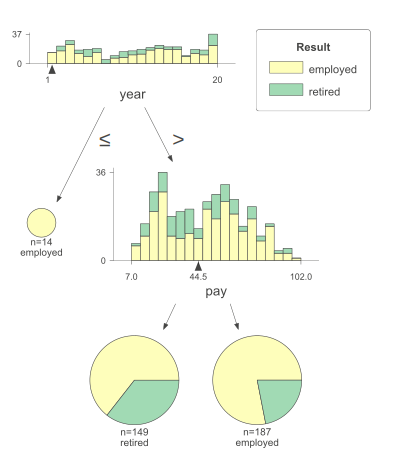

In [160]:
import dtreeviz
viz = dtreeviz.model(model, 
                X_train, y_train,
                feature_names=["year", "pay", "position", "satisfied"],
                target_name="Result",
                class_names=["employed","retired"]
                )
viz.view(scale=1.5)

In [161]:
df_class_p = pd.read_excel("従業員データ予測用.xlsx")
df_class_p_X = df_class_p[["年次","月給(万円)","管理職","社員満足度"]]
pred = model.predict_proba(df_class_p_X)
df_class_p["退職確率"]=pred[:,1]
df_class_p

,社員番号,年次,月給(万円),管理職,社員満足度,退職確率
0,E394502,10,42,0,3.7,0.600567
1,E019192,5,30,0,4.1,0.600567
2,E100493,1,22,0,4.2,0.000000
3,E995840,22,67,1,3.8,0.433361
4,E295101,4,24,0,3.6,0.600567
5,E124391,15,56,1,2.9,0.433361
6,E888933,3,19,0,4.2,0.600567
7,E653222,6,25,0,4.3,0.600567
8,E450123,12,40,0,4.1,0.600567
9,E103911,9,34,0,2.9,0.600567


In [162]:
#ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(class_weight="balanced",
                               max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5)

In [163]:
from sklearn.metrics import confusion_matrix, classification_report
y_train_pred = model.predict(X_train) 
cr = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(cr)#学習データでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.913934,0.688679,0.845714,0.801307,0.853437
recall,0.871094,0.776596,0.845714,0.823845,0.845714
f1-score,0.892000,0.730000,0.845714,0.811000,0.848491
support,256.000000,94.000000,0.845714,350.000000,350.000000


In [164]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,  y_pred) 
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr) #テストデータでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.794118,0.395833,0.666667,0.594975,0.687908
recall,0.736364,0.475000,0.666667,0.605682,0.666667
f1-score,0.764151,0.431818,0.666667,0.597985,0.675529
support,110.000000,40.000000,0.666667,150.000000,150.000000


In [165]:
fi = model.feature_importances_
df_fi=pd.DataFrame({"Feature":X.columns,
              "Importance":fi})
df_fi

,Feature,Importance
0,年次,0.309498
1,月給(万円),0.383887
2,管理職,0.054155
3,社員満足度,0.252460


In [181]:
"""
#SVM
from sklearn.svm import SVC
model = SVC(class_weight="balanced")
model.fit(X_train, y_train)
"""
#勾配ブースティング
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(max_depth=3)
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [182]:
y_train_pred = model.predict(X_train) 
cr = classification_report(y_train, y_train_pred, output_dict=True)
pd.DataFrame(cr)#学習データでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.881944,0.967742,0.897143,0.924843,0.904987
recall,0.992188,0.638298,0.897143,0.815243,0.897143
f1-score,0.933824,0.769231,0.897143,0.851527,0.889619
support,256.000000,94.000000,0.897143,350.000000,350.000000


In [183]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,  y_pred) 
cr = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(cr) #テストデータでの予測結果

,0,1,accuracy,macro avg,weighted avg
precision,0.784000,0.520,0.74,0.652000,0.713600
recall,0.890909,0.325,0.74,0.607955,0.740000
f1-score,0.834043,0.400,0.74,0.617021,0.718298
support,110.000000,40.000,0.74,150.000000,150.000000


In [187]:
df_reg = pd.read_excel("家賃データ.xlsx", index_col="住宅番号")

X = df_reg[["平米", "築年数", "首都圏", "最寄駅からの距離"]]
y = df_reg["Result"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)
df_reg.head()

,平米,築年数,首都圏,最寄駅からの距離,Result
住宅番号,,,,,
#1,74,5,0,7,20.4
#2,29,27,0,12,7.0
#3,111,13,1,17,25.2
#4,74,28,0,9,16.4
#5,105,7,0,5,23.6


In [240]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5)

In [ ]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train)
MSE = mean_squared_error(y_train, y_pred_train)
MSE #学習データの誤差

np.float64(5.726868163807938)

In [ ]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MSE #テストデータの誤差

np.float64(8.6338112564713)

In [243]:
fi = model.feature_importances_
df_fi=pd.DataFrame({"Feature":X.columns,
              "Importance":fi})
df_fi

,Feature,Importance
0,平米,0.819406
1,築年数,0.051662
2,首都圏,0.128665
3,最寄駅からの距離,0.000267


c:\Users\kawam\Documents\IT勉強\practice_pythondata\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


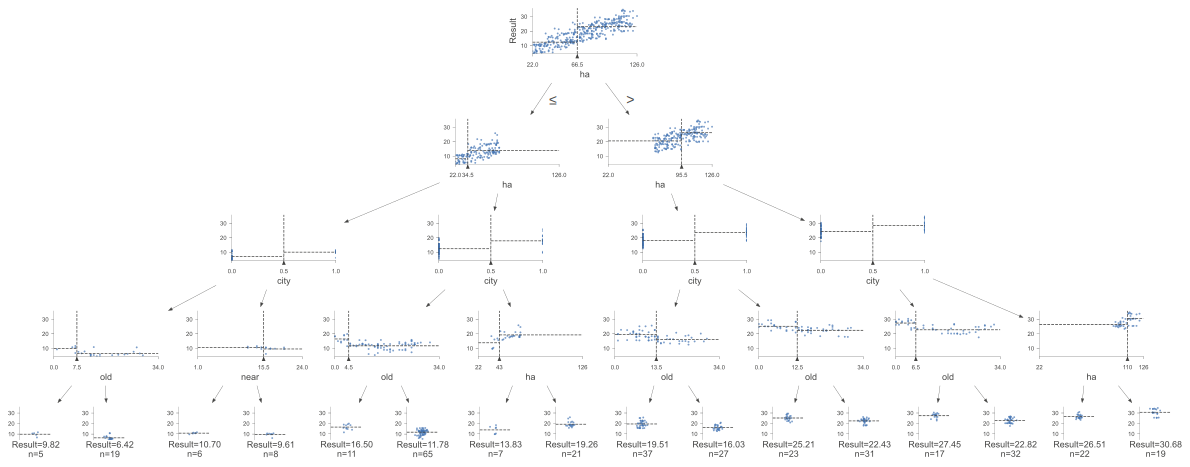

In [244]:
viz = dtreeviz.model(model, 
                X_train, y_train,
                feature_names=["ha", "old", "city", "near"],
                target_name="Result",
                )
viz.view()

In [246]:
df_reg_p = pd.read_excel("家賃データ予測用.xlsx")
df_reg_p_x = df_reg_p[["平米", "築年数", "首都圏", "最寄駅からの距離"]]
pred = model.predict(df_reg_p_x)
df_reg_p["予測家賃金額"] = pred
df_reg_p

,住宅番号,平米,築年数,首都圏,最寄駅からの距離,予測家賃金額
0,#1,67,10,0,5,19.508108
1,#2,53,6,0,20,11.778462
2,#3,85,4,1,7,25.213043
3,#4,27,28,0,6,6.415789
4,#5,101,6,0,5,27.447059
5,#6,75,21,0,19,16.029630
6,#7,54,5,1,11,19.257143
7,#8,65,1,1,17,19.257143
8,#9,36,0,0,10,16.500000
9,#10,28,3,0,8,9.820000


In [313]:
#SVM
from sklearn.svm import SVR
model = SVR()
model.fit(X_train, y_train)

#ランダムフォレスト
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=4)
model.fit(X_train, y_train)

#勾配ブースティング
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(min_samples_leaf=3)
model.fit(X_train, y_train)


GradientBoostingRegressor(min_samples_leaf=3)

In [314]:
y_pred_train = model.predict(X_train)
MSE = mean_squared_error(y_train, y_pred_train)
MSE #学習データの誤差

np.float64(2.2773953867014933)

In [315]:
y_pred = model.predict(X_test)
MSE = mean_squared_error(y_test, y_pred)
MSE #テストデータの誤差

np.float64(6.059919584791222)